In [1]:
%pylab inline
import glob
import json
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_distances
from vectorizer import Vectorizer
from downloader import *

folder='model'
#get_news(folder=folder)



Populating the interactive namespace from numpy and matplotlib


In [2]:
# get news texts
news = json.load(open(glob.glob(folder+'/news*.json')[-1]))
data,articles = [],[]
for source in news.keys():
        for title,article in news[source].items():
            data.append(article['text'])
            predictions = [prediction['probability'] for prediction in article['prediction']]
            articles.append(
            {   'source':source,\
                'title':title,\
                'url':article['url'],\
                'prediction':article['prediction'],\
                'predictedLabel':article['prediction'][argmax(predictions)]['party']})


In [15]:
# switched again to unigram Bow - better interpretability for finding out what's going wrong with the distances
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# worked a bit on more stopwords - mainly filtering out html related noise
stops = map(lambda x:x.lower().strip(),open('model/stopwords.txt').readlines()[6:])
print stops[:10]

# using now stopwords and filtering out digits
bow = TfidfVectorizer(min_df=2,stop_words=stops)

X = bow.fit_transform(data)
Xdense = array(X.todense())

# creating bow-index-to-word map
idx2word = dict(zip(bow.vocabulary_.values(),bow.vocabulary_.keys()))
nneighbors = 5

['media', 'wirtschaft', 'ausland', 'imageurl', 'dutzende', 'millionen', 'cdn', 'imagealttext', 'is', 'suffixlabel']


******************
Britische EU-Wünsche:: Schulz kommt Cameron entgegen
http://www.faz.net/aktuell/politik/europaeische-union/britische-eu-wuensche-schulz-kommt-cameron-entgegen-13620561.html
Topwords:eu premierminister großbritannien cameron schulz
	EU-Verträge: Cameron mit Änderungswünschen allein 11.286038
	 URL: http://www.faz.net/aktuell/politik/europaeische-union/eu-vertraege-cameron-mit-aenderungswuenschen-allein-13620607.html
	Topwords:reform eu großbritannien cameron verträge
	******************
	Cameron in Berlin: Britischer Premierminister wirbt für EU-Reformen 11.728301
	 URL: http://www.welt.de/videos/article141673986/Britischer-Premierminister-wirbt-fuer-EU-Reformen.html
	Topwords:wirbt warb reformieren ideen premierminister
	******************
	Greser & Lenz: Gesammelte Werke 11.813803
	 URL: http://www.faz.net/aktuell/feuilleton/cartoons/greser-lenz-witze-fuer-deutschland-1294625.html
	Topwords:groß täglich komische aufgestiegen lenz
	******************
	Umweltsünde: Be

<matplotlib.colorbar.Colorbar instance at 0x10a3e9560>

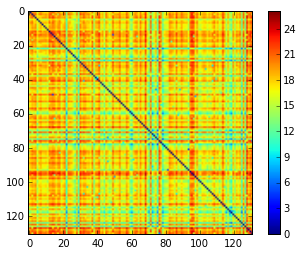

In [16]:
K = pairwise_distances(Xdense,metric='l1',n_jobs=-1)

nneighbors = 5
for urlidx in range(K.shape[0]):
    idx =  (K[urlidx,:]).argsort()[1:nneighbors+1]

    print "******************"
    print articles[urlidx]['title'] + "\n"  + articles[urlidx]['url'] 
    print 'Topwords:'+' '.join([idx2word[wi] for wi in Xdense[urlidx,:].argsort()[-nneighbors:]])
    for iidx in idx:
        print '\t'+articles[iidx]['title'] + ' %f'%K[urlidx][iidx] + '\n\t URL: ' +articles[iidx]['url'] 
        print '\tTopwords:'+' '.join([idx2word[wi] for wi in Xdense[iidx,:].argsort()[-nneighbors:]])
        print "\t******************"


imshow(K)
colorbar()


******************
Britische EU-Wünsche:: Schulz kommt Cameron entgegen
http://www.faz.net/aktuell/politik/europaeische-union/britische-eu-wuensche-schulz-kommt-cameron-entgegen-13620561.html
Topwords:eu premierminister großbritannien cameron schulz
	EU-Verträge: Cameron mit Änderungswünschen allein 0.941243
	 URL: http://www.faz.net/aktuell/politik/europaeische-union/eu-vertraege-cameron-mit-aenderungswuenschen-allein-13620607.html
	Topwords:reform eu großbritannien cameron verträge
	******************
	Cameron steht allein auf weiter Flur 0.946626
	 URL: http://www.welt.de/politik/ausland/article141698701/Cameron-steht-allein-auf-weiter-Flur.html
	Topwords:briten schulz cameron verträge eu
	******************
	Änderung der EU-Verträge: Merkel lässt Cameron zappeln 1.135715
	 URL: http://www.sueddeutsche.de/politik/aenderung-der-eu-vertraege-merkel-laesst-cameron-zappeln-1.2498865
	Topwords:2499875 2495401 eu merkel cameron
	******************
	Merkel schließt Änderung der EU-Verträge

<matplotlib.colorbar.Colorbar instance at 0x10a5bb9e0>

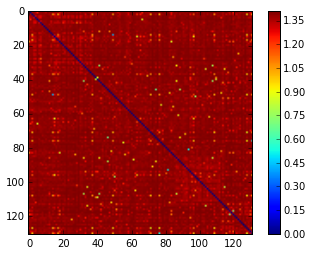

In [17]:
K = pairwise_distances(X,metric='l2',n_jobs=-1)

nneighbors = 5
for urlidx in range(K.shape[0]):
    idx =  (K[urlidx,:]).argsort()[1:nneighbors+1]

    print "******************"
    print articles[urlidx]['title'] + "\n"  + articles[urlidx]['url'] 
    print 'Topwords:'+' '.join([idx2word[wi] for wi in Xdense[urlidx,:].argsort()[-nneighbors:]])
    for iidx in idx:
        print '\t'+articles[iidx]['title'] + ' %f'%K[urlidx][iidx] + '\n\t URL: ' +articles[iidx]['url'] 
        print '\tTopwords:'+' '.join([idx2word[wi] for wi in Xdense[iidx,:].argsort()[-nneighbors:]])
        print "\t******************"


imshow(K)
colorbar()


******************
Britische EU-Wünsche:: Schulz kommt Cameron entgegen
http://www.faz.net/aktuell/politik/europaeische-union/britische-eu-wuensche-schulz-kommt-cameron-entgegen-13620561.html
Topwords:eu premierminister großbritannien cameron schulz
	EU-Verträge: Cameron mit Änderungswünschen allein 0.442970
	 URL: http://www.faz.net/aktuell/politik/europaeische-union/eu-vertraege-cameron-mit-aenderungswuenschen-allein-13620607.html
	Topwords:reform eu großbritannien cameron verträge
	******************
	Cameron steht allein auf weiter Flur 0.448050
	 URL: http://www.welt.de/politik/ausland/article141698701/Cameron-steht-allein-auf-weiter-Flur.html
	Topwords:briten schulz cameron verträge eu
	******************
	Änderung der EU-Verträge: Merkel lässt Cameron zappeln 0.644924
	 URL: http://www.sueddeutsche.de/politik/aenderung-der-eu-vertraege-merkel-laesst-cameron-zappeln-1.2498865
	Topwords:2499875 2495401 eu merkel cameron
	******************
	Merkel schließt Änderung der EU-Verträge

<matplotlib.colorbar.Colorbar instance at 0x10b4a1170>

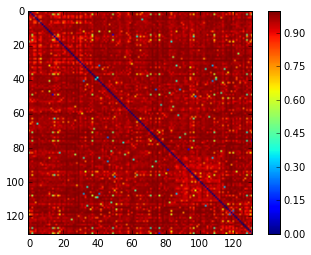

In [18]:
K = pairwise_distances(X,metric='cosine',n_jobs=-1)

nneighbors = 5
for urlidx in range(K.shape[0]):
    idx =  (K[urlidx,:]).argsort()[1:nneighbors+1]

    print "******************"
    print articles[urlidx]['title'] + "\n"  + articles[urlidx]['url'] 
    print 'Topwords:'+' '.join([idx2word[wi] for wi in Xdense[urlidx,:].argsort()[-nneighbors:]])
    for iidx in idx:
        print '\t'+articles[iidx]['title'] + ' %f'%K[urlidx][iidx] + '\n\t URL: ' +articles[iidx]['url'] 
        print '\tTopwords:'+' '.join([idx2word[wi] for wi in Xdense[iidx,:].argsort()[-nneighbors:]])
        print "\t******************"


imshow(K)
colorbar()